<a href="https://colab.research.google.com/github/iasonasxrist/DetectionofCovid19/blob/main/COVID_19_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CNN Model for detection of COVID-19 in Chest CT Images
#Now we're going to explore the dataset that contains chest x-ray images of people who have pneumonia and people who don't.
#Our main goal is to predict if a person has pneumonia or not based of off their chest x-ray image.
#So now we'll display one chest x-ray image of a person with pneumonia and one with a person without pneumonia, just to have a glimpse of what each image looks like in general

In [ ]:
import numpy as np 
from matplotlib import pyplot  as plt
import keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers.core import  Dense, Dropout , Flatten 
from keras.layers.convolutional import Conv2D, MaxPooling2D , ZeroPadding2D
from keras.optimizers import SGD ,Adam, RMSprop
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Checking Dataset
from google.colab import files
files=files.upload()

In [ ]:
#Before importing the data
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#Import the dataset from kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#Let Visualize Data from Kaggle
!ls

chest-xray-pneumonia.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"
with ZipFile (file_name ,'r') as zip:
  zip.extractall()
  print('Done!')

Done!


In [ ]:
 #Path acquiring 
path_train = "/content/chest_xray/train"
path_test = "/content/chest_xray/test"
path_val = "/content/chest_xray/val"
print(path_train)
print(path_test)
print(path_val)


/content/chest_xray/train
/content/chest_xray/test
/content/chest_xray/val


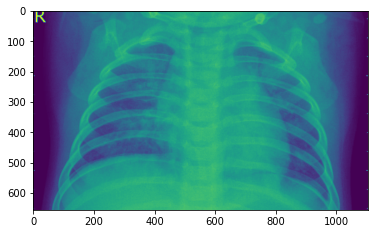

In [ ]:
img = glob(path_train+"/PNEUMONIA/*.jpeg")
img = np.asarray(plt.imread(img[0]))
plt.imshow(img)


In [ ]:
img.shape

(656, 1104)

In [ ]:
classes = ["NORMAL", "PNEUMONIA"]
train_data = glob(path_train+"/NORMAL/*.jpeg")
train_data += glob(path_train+"/PNEUMONIA/*.jpeg")
data_gen = ImageDataGenerator() #Data Augmentation

In [ ]:
train_batches = data_gen.flow_from_directory(path_train, target_size = (226, 226), classes = classes, class_mode = "categorical")
val_batches = data_gen.flow_from_directory(path_val, target_size = (226, 226), classes = classes, class_mode = "categorical")
test_batches = data_gen.flow_from_directory(path_test, target_size = (226, 226), classes = classes, class_mode = "categorical")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_batches.image_shape

NameError: ignored

In [ ]:
#Model
#def VGG_16():
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 226, 226, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 228, 228, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 226, 226, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 128)     7

In [ ]:
#Training the Model
 #steps_per_epoch = 500
optimizers = Adam(lr=0.0001)

#early_stopping_monitor = EarlyStopping(patience=3 , monitor='val_acc', mode='max', verbose =2)
model.compile(loss='categorical_crossentropy' , metrics=['accuracy'] , optimizer=optimizers)

history = model.fit(train_batches,   epochs=4 , shuffle=True , validation_data=val_batches , validation_steps=10 )

prediction= model.predict(train_batches , verbose =2 , steps=100)

Epoch 1/4
163/163 [==============================] - 9613s 59s/step - loss: 0.3650 - accuracy: 0.8472 - val_loss: 0.2996 - val_accuracy: 0.8750
Epoch 2/4
163/163 [==============================] - 9621s 59s/step - loss: 0.1471 - accuracy: 0.9461
Epoch 3/4
163/163 [==============================] - 9632s 59s/step - loss: 0.0832 - accuracy: 0.9711
Epoch 4/4
163/163 [==============================] - 9659s 59s/step - loss: 0.0748 - accuracy: 0.9726
100/100 - 1645s


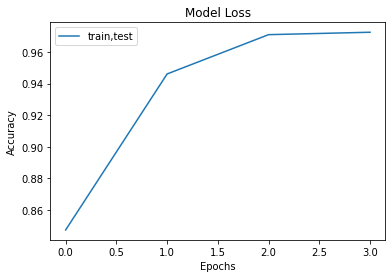

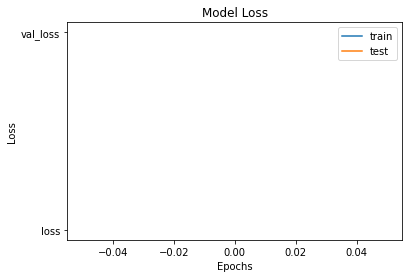

In [ ]:
#Visualization Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train,test'], loc='best')
plt.show()
#Visualization Loss
plt.plot(['loss'])
plt.plot(['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'] , loc='best')
plt.show()
#Save the model architecture
json_string = model.to_json()

In [ ]:
#test model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
for i in prediction:
  print(i)
#cm  = confusion_matrix(['accuracy'], prediction,labels=[1,0])
#cm = confusion_matrix(history.history, prediction)
#sns.heatmap(cm, annot=True, fmt="d")


[0.98570204 0.014298  ]
[1.1591956e-04 9.9988401e-01]
[1.8695698e-10 1.0000000e+00]
[0.00263432 0.99736565]
[0.7111663  0.28883365]
[0.9949108  0.00508919]
[0.35649678 0.6435031 ]
[0.9655592 0.0344409]
[7.016019e-07 9.999993e-01]
[9.991351e-01 8.649423e-04]
[6.1747804e-04 9.9938250e-01]
[0.01040959 0.98959047]
[0.9196932  0.08030681]
[8.057962e-06 9.999919e-01]
[0.97199327 0.02800674]
[1.6621390e-05 9.9998343e-01]
[0.00114222 0.99885774]
[6.8016212e-05 9.9993193e-01]
[1.3442688e-06 9.9999869e-01]
[0.05764571 0.9423543 ]
[0.02963419 0.9703658 ]
[0.94866216 0.0513378 ]
[0.01113311 0.98886687]
[0.8883499  0.11165008]
[0.02213351 0.9778665 ]
[0.9952514  0.00474859]
[6.9300433e-05 9.9993074e-01]
[4.246863e-06 9.999957e-01]
[0.958649   0.04135108]
[0.9550859 0.0449141]
[0.02367314 0.9763268 ]
[5.267120e-04 9.994733e-01]
[8.1099843e-04 9.9918896e-01]
[0.82129705 0.17870301]
[0.970626   0.02937401]
[0.9528516  0.04714841]
[1.6765222e-05 9.9998319e-01]
[1.6860355e-06 9.9999833e-01]
[0.3854574  

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(prediction,test_batches)

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks ,classes , rotation=45)
    plt.yticks(tick_marks ,classes)
    
    if normalize:
        cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
        
    else:
        print('Confusion matrix , without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j , i , cm[i,j] , horizontalalignment="center", color="white" if cm[i,j]>thresh  else "black" )
        
    plt.tight_layout()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

NameError: ignored